In [0]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Data

In [0]:
sentences = []

for i in range(100000):
    start = np.random.randint(0, 10)  #generate the random numbers in the range of 1:10
    finish = start + np.random.randint(3, 20)
    sentence = [str(x)for x in range(start, finish)]
    
    sentences.append(sentence)

In [0]:
sentences

[['0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18'],
 ['6', '7', '8'],
 ['7', '8', '9', '10', '11'],
 ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 ['2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17'],
 ['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'],
 ['9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25'],
 ['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15'],
 ['0', '1', '2', '3', '4', '5', '6', '7'],
 ['5', '6', '7', '8', '9', '10', '11', '12', '13'],
 ['9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'],
 ['7', '8', '9', '10', '11', '12', '13', '14', '15'],
 ['4', '5', '6', '7', '8', '9', '10', '11'],
 ['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15'],
 ['9',
  '10',
  '11',
  '12',
  '13',
  '14

#Word2Vec Model

In [0]:
#we are training our model now
model = Word2Vec(sentences, size=10, window=5, min_count=1)  

In [0]:
model.wv['3']

array([-3.2819304 ,  0.8015389 , -0.47670782, -2.1603274 , -2.056935  ,
        0.1396209 ,  2.5365503 ,  2.810549  ,  2.5401478 , -1.2617719 ],
      dtype=float32)

In [0]:
def plot_heatmap(model):
    plt.figure(figsize=(15, 8))
    sns.heatmap(model.wv[model.wv.vocab], linewidths=0.5);

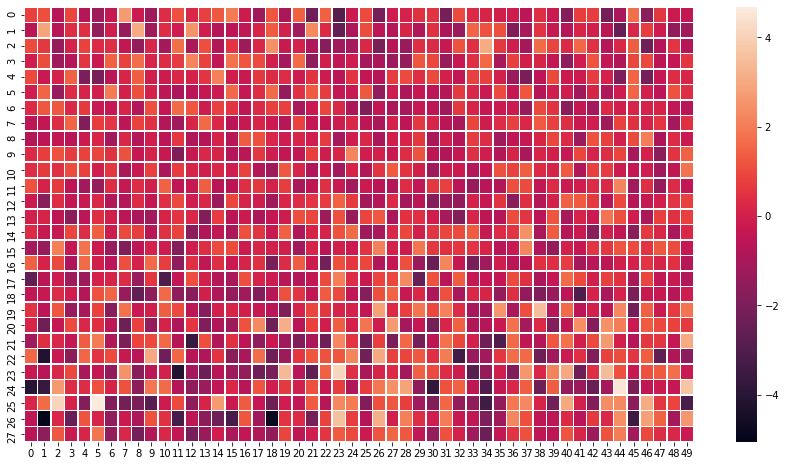

In [0]:
plot_heatmap(Word2Vec(sentences, size=50, window=10))

#PCA

In [0]:
#there is a visualisation of our data made by PCA
def plot_pca(model):
    X = model.wv[model.wv.vocab]
    pca_model = PCA(n_components=2)
    result = pca_model.fit_transform(X)

    plt.figure(figsize=(8, 5))
    plt.scatter(result[:,0], result[:,1]);

    words = list(model.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

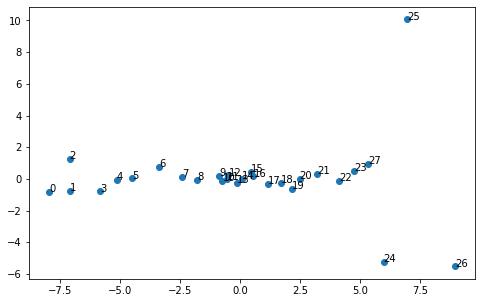

In [0]:
plot_pca(Word2Vec(sentences, size=50, window=10))

#Similary words

In [0]:
model = Word2Vec(sentences, size=50, window=5)

In [0]:
model.wv.most_similar('10', topn=3)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('21', 0.14594808220863342),
 ('23', 0.14142769575119019),
 ('20', 0.11962337791919708)]

In [0]:
model.wv.most_similar(positive=['10', '8'], negative=['6'], topn=3)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('26', 0.2727886438369751),
 ('20', 0.19284595549106598),
 ('23', 0.17508894205093384)]